In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
%matplotlib inline

In [2]:
sns.get_dataset_names()[:40]

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('tips')
df.head()1. What is the average tip amount across different days and times?
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [5]:
####1. What is the average tip amount across different days and times?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14032\1789488827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_day_time = df.groupby(['day','time'])['tip'].agg(['mean','median','count']).reset_index()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14032\1789488827.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='day', y='tip', hue='time', ci='sd')


    day    time      mean  median  count
0  Thur   Lunch  2.767705    2.30     61
1  Thur  Dinner  3.000000    3.00      1
2   Fri   Lunch  2.382857    2.20      7
3   Fri  Dinner  2.940000    3.00     12
4   Sat   Lunch       NaN     NaN      0
5   Sat  Dinner  2.993103    2.75     87
6   Sun   Lunch       NaN     NaN      0
7   Sun  Dinner  3.255132    3.15     76


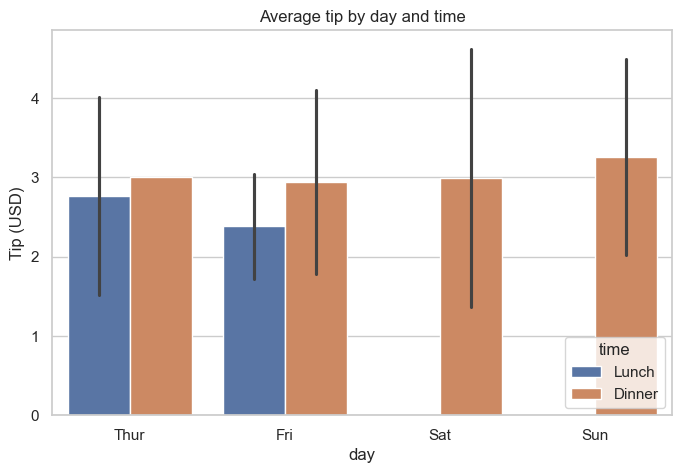

In [6]:
tips_day_time = df.groupby(['day','time'])['tip'].agg(['mean','median','count']).reset_index()
print(tips_day_time)


# Bar plot: average tip by day and time
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='day', y='tip', hue='time', ci='sd')
plt.title('Average tip by day and time')
plt.ylabel('Tip (USD)')
plt.show()

In [7]:
### Observation: Use the bar plot & grouped table to record which day/time combos give higher tips (typically Dinner > Lunch; weekend days often higher).


In [8]:
### 2. Do male and female customers tip differently?

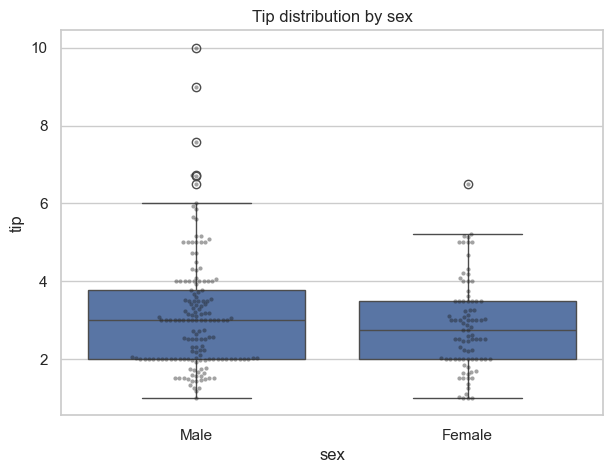

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14032\2011797796.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='sex', y='tip')
sns.swarmplot(data=df, x='sex', y='tip', color='k', alpha=0.4, size=3)
plt.title('Tip distribution by sex')
plt.show()


# Summary
df.groupby('sex')['tip'].describe()

In [13]:
###Observation: Boxplots plus swarmplot show distribution; compare medians and IQRs.

In [14]:
###3. Relationship between total bill and tip — linear trend?

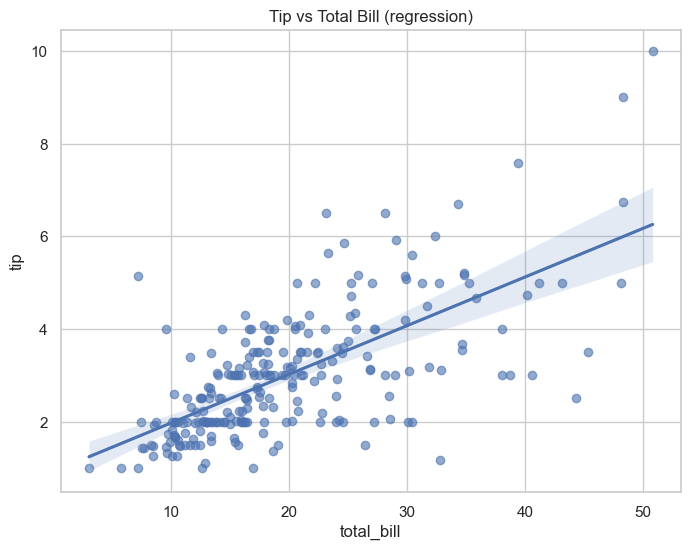

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [15]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='total_bill', y='tip', scatter_kws={'alpha':0.6})
plt.title('Tip vs Total Bill (regression)')
plt.show()


# Correlation
df[['total_bill','tip']].corr()

In [16]:
### 4. Does party size influence tip percentage?

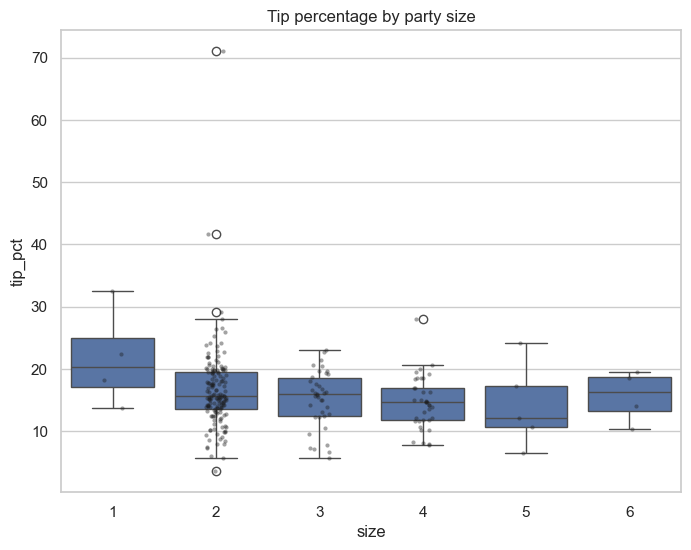

,size,mean,median,count
0,1,21.729202,20.275206,4
1,2,16.571919,15.610418,156
2,3,15.215685,15.932311,38
3,4,14.594901,14.669927,37
4,5,14.149549,12.138869,5
5,6,15.622920,16.289124,4


In [17]:
# Create tip percentage
df['tip_pct'] = 100 * df['tip'] / df['total_bill']


plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='size', y='tip_pct')
sns.stripplot(data=df, x='size', y='tip_pct', color='k', alpha=0.4, size=3)
plt.title('Tip percentage by party size')
plt.show()


# Summary
df.groupby('size')['tip_pct'].agg(['mean','median','count']).reset_index()

In [18]:
#### 5. Which day has highest average total bill?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14032\4144379757.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_total = df.groupby('day')['total_bill'].agg(['mean','median','count']).sort_values('mean', ascending=False)


           mean  median  count
day                           
Sun   21.410000   19.63     76
Sat   20.441379   18.24     87
Thur  17.682742   16.20     62
Fri   17.151579   15.38     19


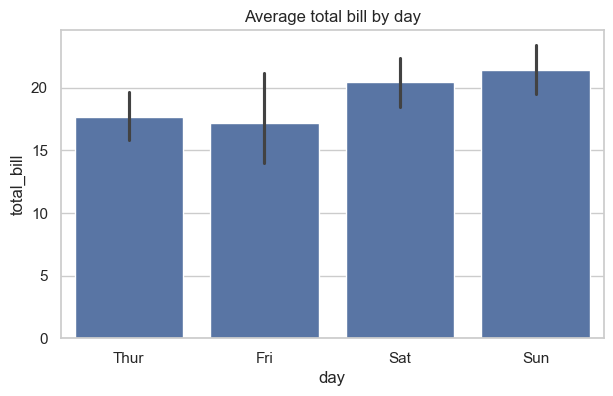

In [19]:
day_total = df.groupby('day')['total_bill'].agg(['mean','median','count']).sort_values('mean', ascending=False)
print(day_total)


plt.figure(figsize=(7,4))
sns.barplot(data=df, x='day', y='total_bill', order=['Thur','Fri','Sat','Sun'])
plt.title('Average total bill by day')
plt.show()

In [20]:
#### 6. Are tips affected by smoking status?


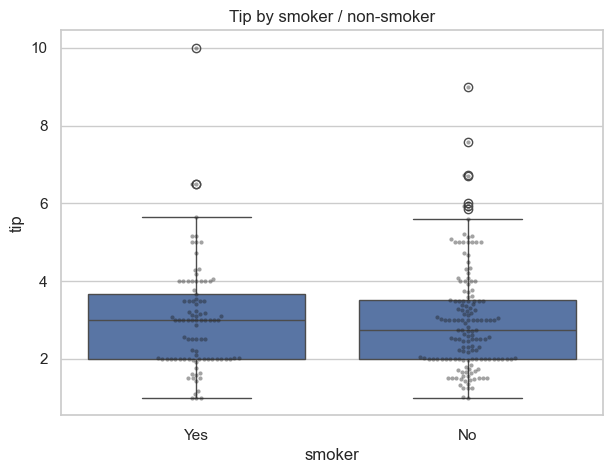

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14032\1189317252.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['tip'].agg(['mean','median','count'])


,mean,median,count
smoker,,,
Yes,3.008710,3.00,93
No,2.991854,2.74,151


In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='smoker', y='tip')
sns.swarmplot(data=df, x='smoker', y='tip', color='k', alpha=0.4, size=3)
plt.title('Tip by smoker / non-smoker')
plt.show()


# Stats
df.groupby('smoker')['tip'].agg(['mean','median','count'])

In [22]:
#### 7. Distribution of total bills and tips (histograms & KDE)

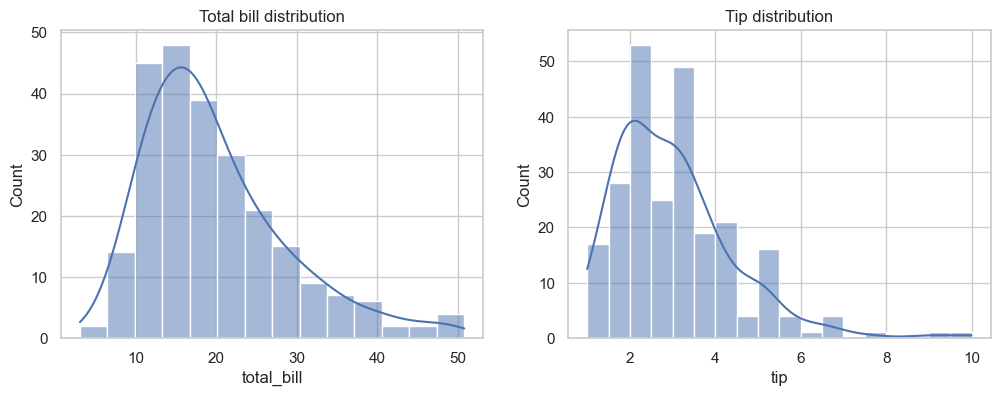

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['total_bill'], kde=True)
plt.title('Total bill distribution')


plt.subplot(1,2,2)
sns.histplot(df['tip'], kde=True)
plt.title('Tip distribution')
plt.show()

In [24]:
####Dataset 2 — iris


In [25]:
iris = sns.load_dataset('iris')
iris.head()
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
#### Compare petal length and width across species

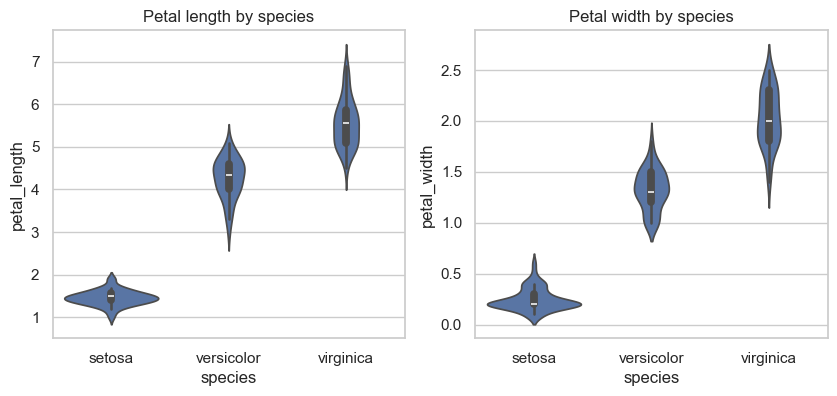

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.violinplot(data=iris, x='species', y='petal_length')
plt.title('Petal length by species')


plt.subplot(1,2,2)
sns.violinplot(data=iris, x='species', y='petal_width')
plt.title('Petal width by species')
plt.show()

In [28]:
###Which features are most useful to distinguish species?

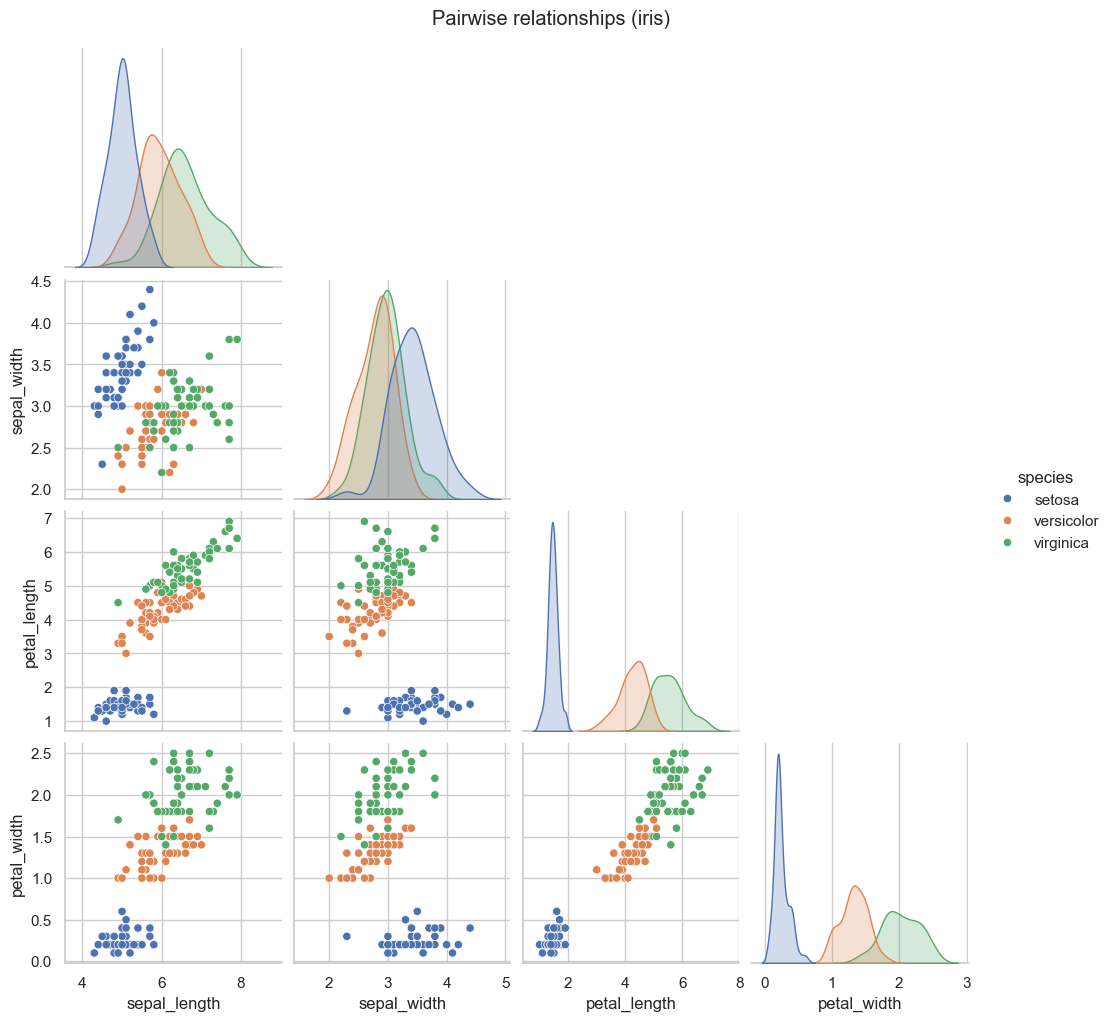

In [29]:
sns.pairplot(iris, hue='species', corner=True)
plt.suptitle('Pairwise relationships (iris)', y=1.02)
plt.show()

In [30]:
###Petal length and width are most separable (Iris-versicolor and Iris-virginica may overlap a bit; setosa is distinct).

In [32]:
##Clusters/overlaps and variable with highest variance


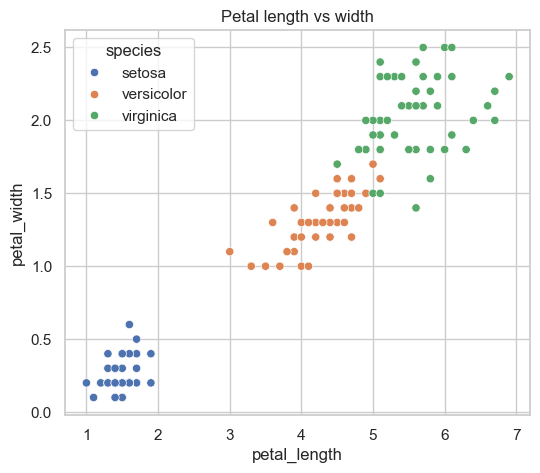

In [35]:

# Scatter example
plt.figure(figsize=(6,5))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.title('Petal length vs width')
plt.show()

In [36]:
###Dataset 3 — titanic


In [37]:
titanic = sns.load_dataset('titanic')
titanic.head()
titanic.info()
titanic.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
###1. Percentage of passengers who survived

Survived: 38.38%


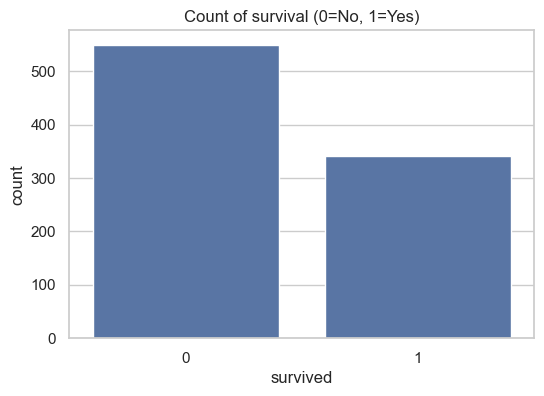

In [39]:
survival_pct = titanic['survived'].mean() * 100
print(f"Survived: {survival_pct:.2f}%")



# Count plot
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='survived')
plt.title('Count of survival (0=No, 1=Yes)')
plt.show()

In [40]:
## 2. Survival by gender and class

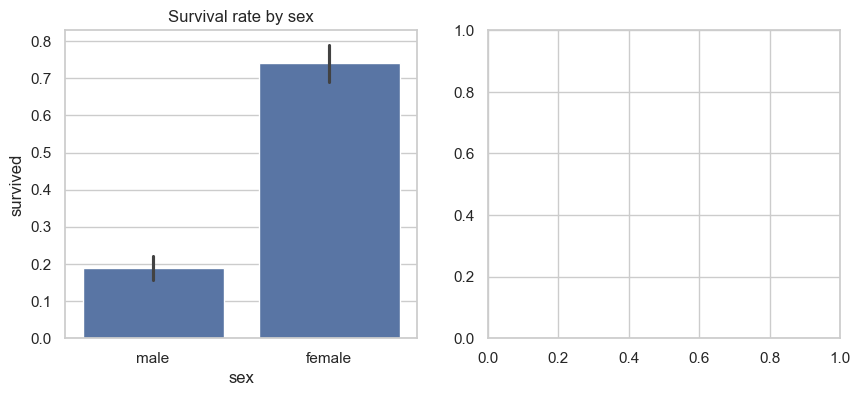

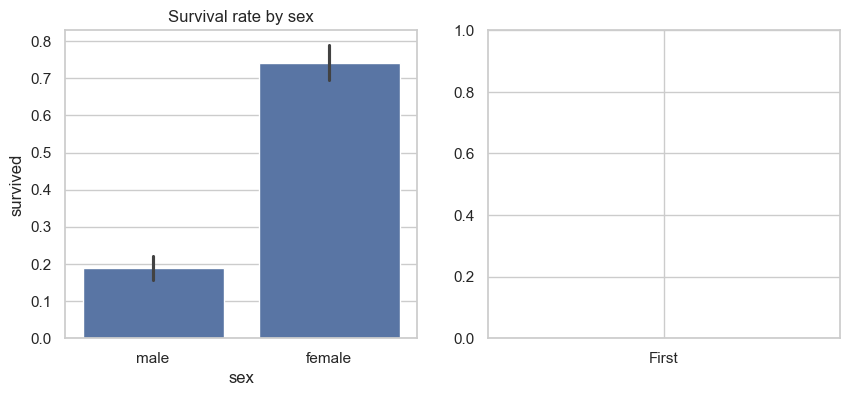

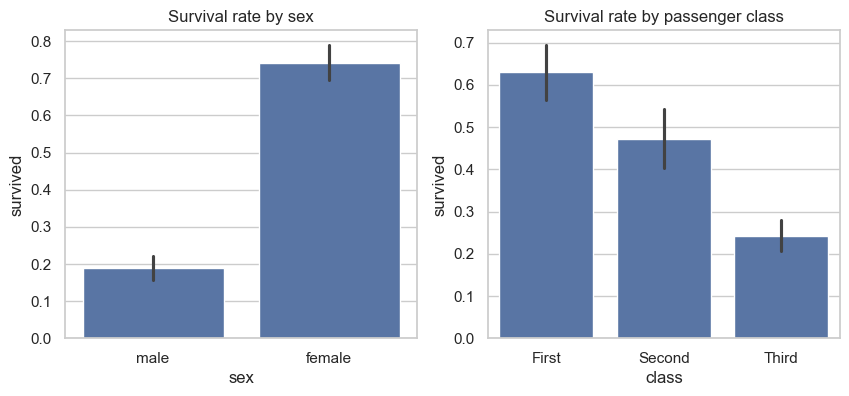

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data=titanic, x='sex', y='survived')
plt.title('Survival rate by sex')


plt.subplot(1,2,2)
sns.barplot(data=titanic, x='class', y='survived')
plt.title('Survival rate by passenger class')
plt.show()

In [45]:
## 3. Are younger passengers more likely to survive?

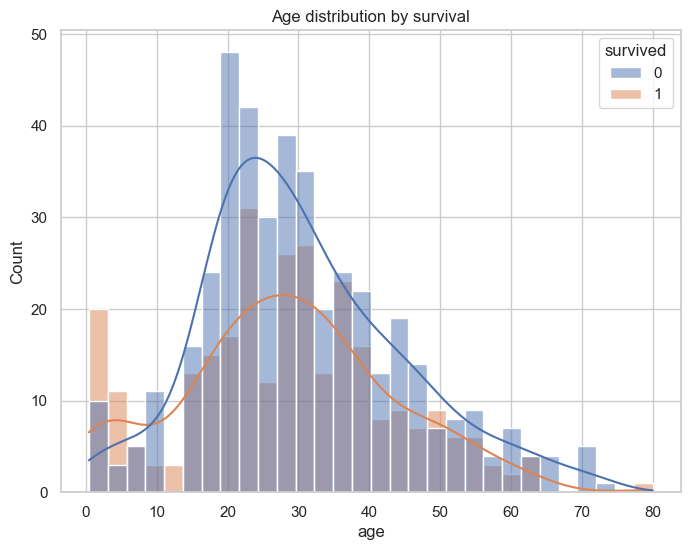

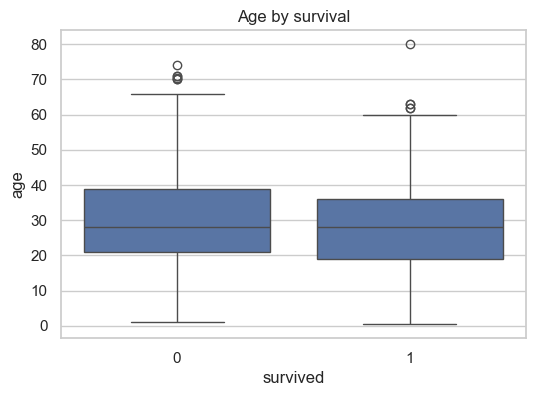

In [46]:
plt.figure(figsize=(8,6))
sns.histplot(data=titanic, x='age', hue='survived', bins=30, kde=True)
plt.title('Age distribution by survival')
plt.show()


# Age vs survival via boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data=titanic, x='survived', y='age')
plt.title('Age by survival')
plt.show()

In [47]:
### 4. Fare amount relation to survival

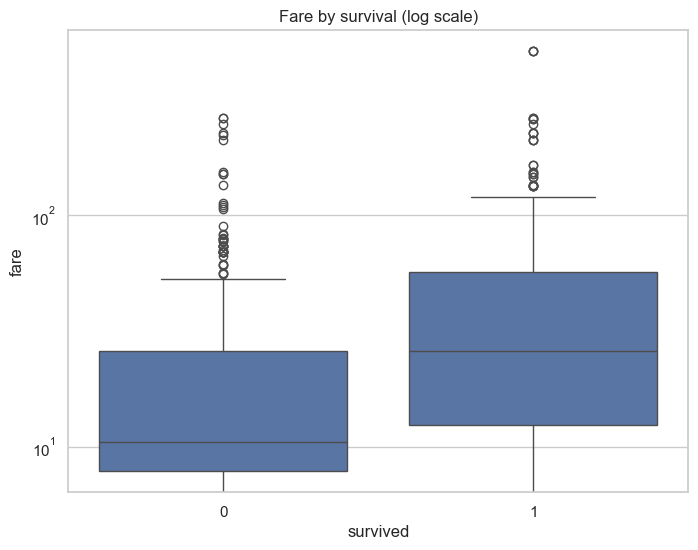

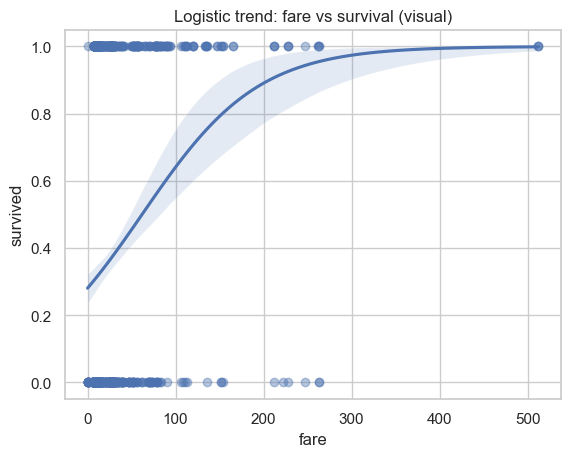

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic, x='survived', y='fare')
plt.yscale('log')
plt.title('Fare by survival (log scale)')
plt.show()


sns.regplot(data=titanic.dropna(subset=['fare','survived']), x='fare', y='survived', logistic=True, scatter_kws={'alpha':0.4})
plt.title('Logistic trend: fare vs survival (visual)')
plt.show()

In [49]:
## 5. Survival by embarkation port


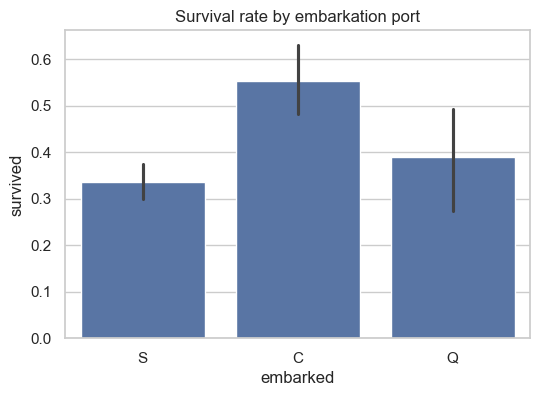

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='embarked', y='survived')
plt.title('Survival rate by embarkation port')
plt.show()

In [51]:
### 6. Age distribution across classes

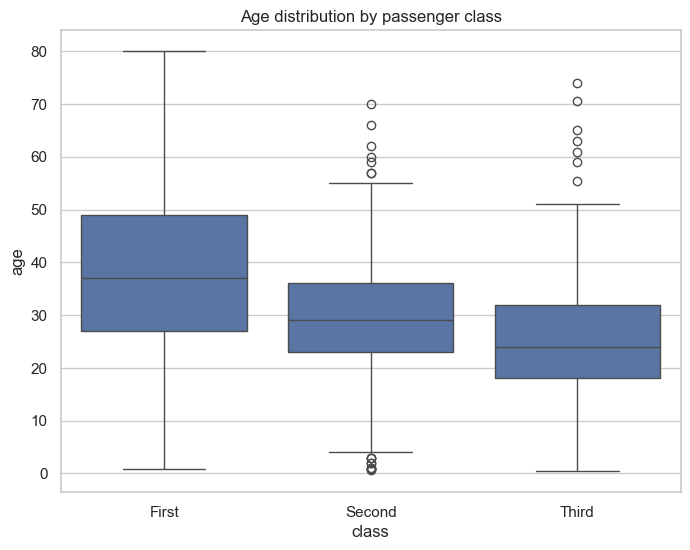

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic, x='class', y='age')
plt.title('Age distribution by passenger class')
plt.show()

In [53]:
#### Dataset 4 — penguins

In [54]:
penguins = sns.load_dataset('penguins')
penguins.head()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [55]:
##Average body mass across species

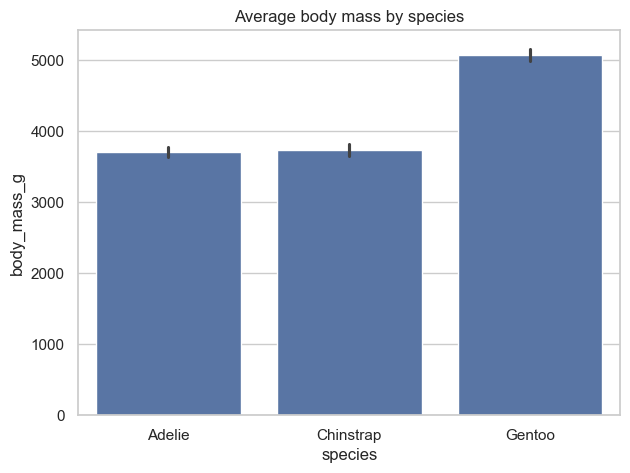

In [56]:
penguins.groupby('species')['body_mass_g'].agg(['mean','median','count']).reset_index()


plt.figure(figsize=(7,5))
sns.barplot(data=penguins, x='species', y='body_mass_g')
plt.title('Average body mass by species')
plt.show()

In [57]:
### Flipper length by island

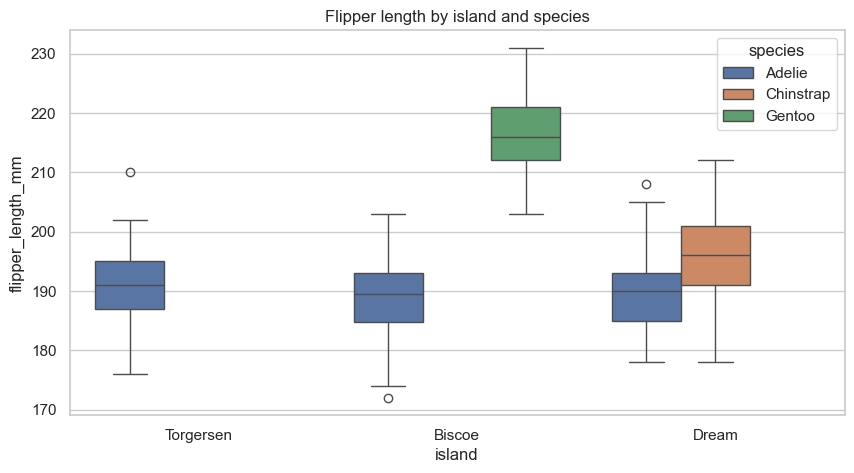

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(data=penguins, x='island', y='flipper_length_mm', hue='species')
plt.title('Flipper length by island and species')
plt.show()

In [59]:
### Strongest correlations & pairplot

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


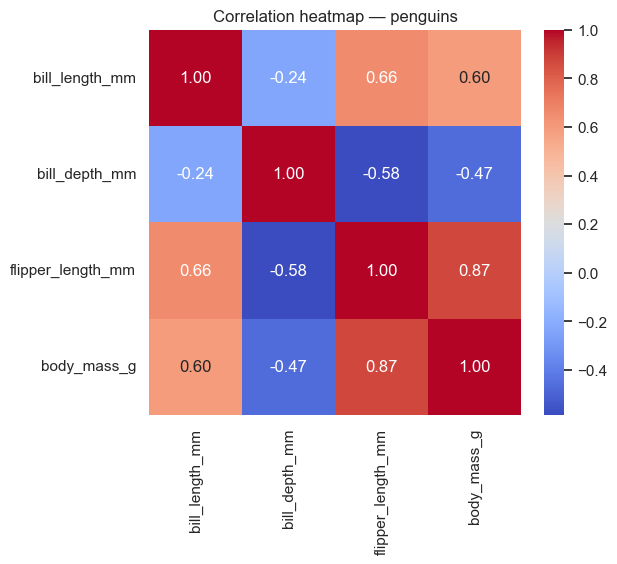

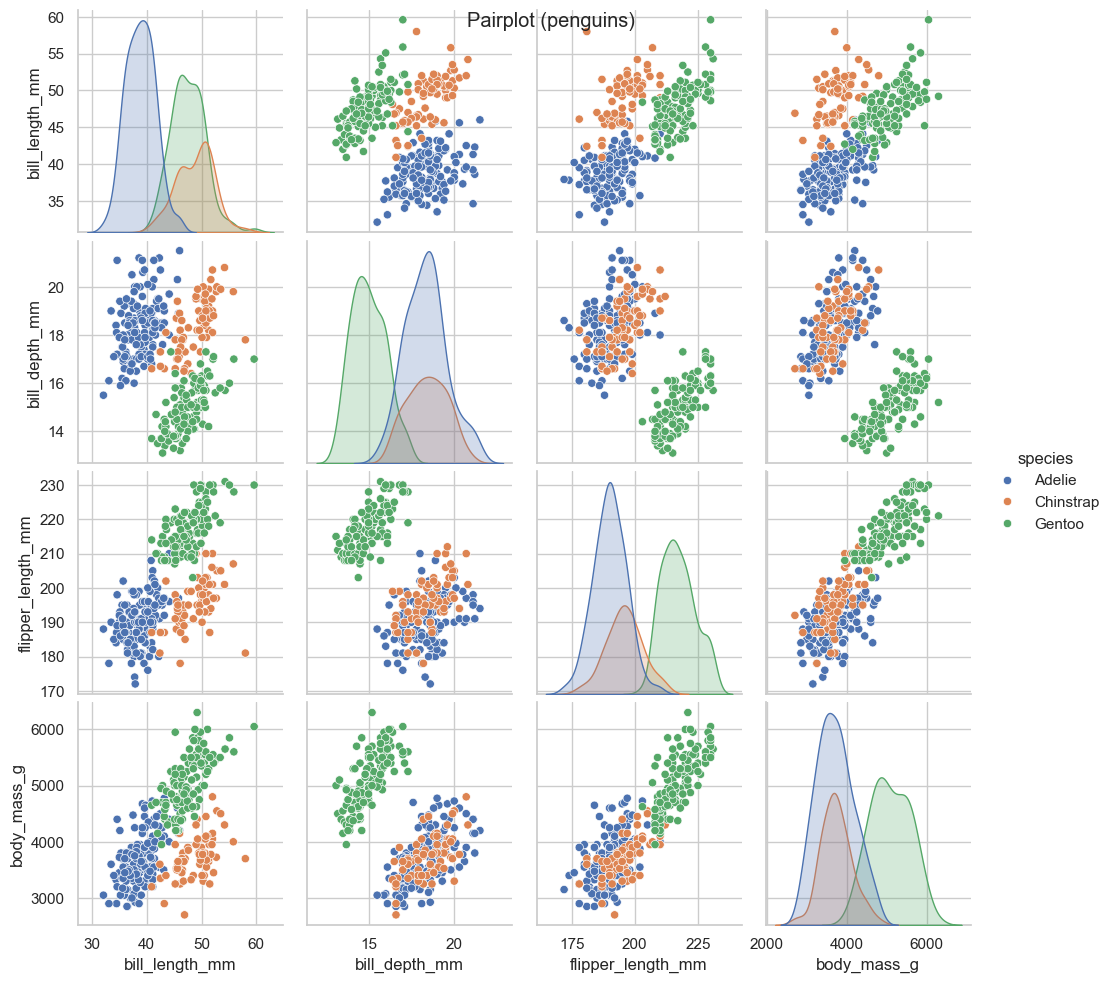

In [60]:
num_cols = penguins.select_dtypes(include=['float64','int64']).columns
corr = penguins[num_cols].corr()
print(corr)


plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation heatmap — penguins')
plt.show()


sns.pairplot(penguins.dropna(), hue='species')
plt.suptitle('Pairplot (penguins)')
plt.show()

In [61]:
### Dataset 5 — diamonds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


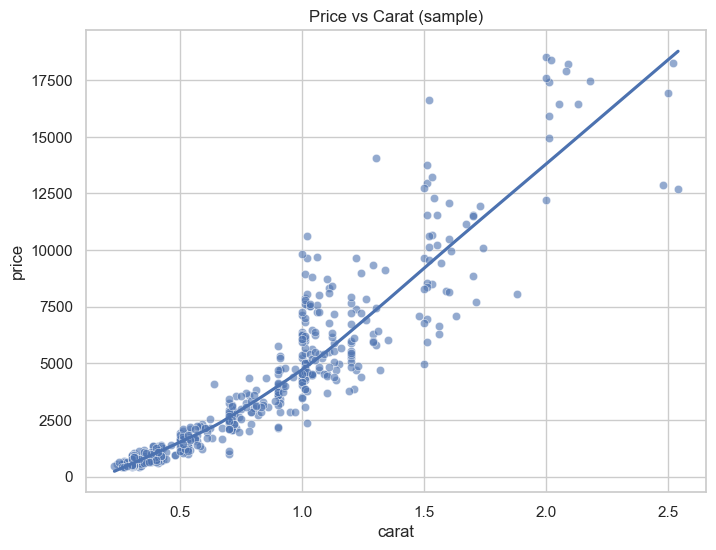

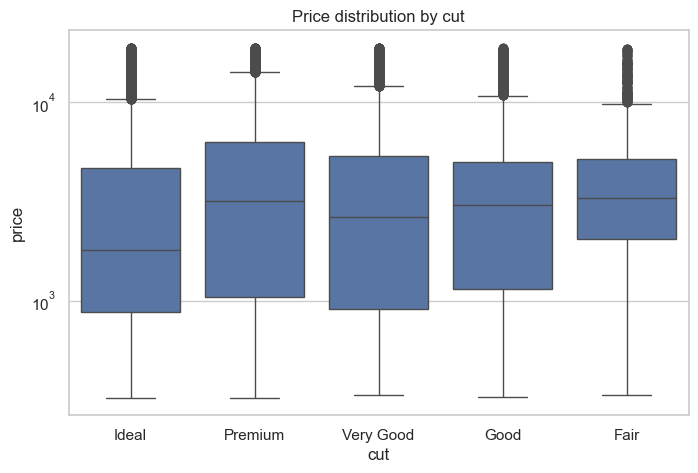

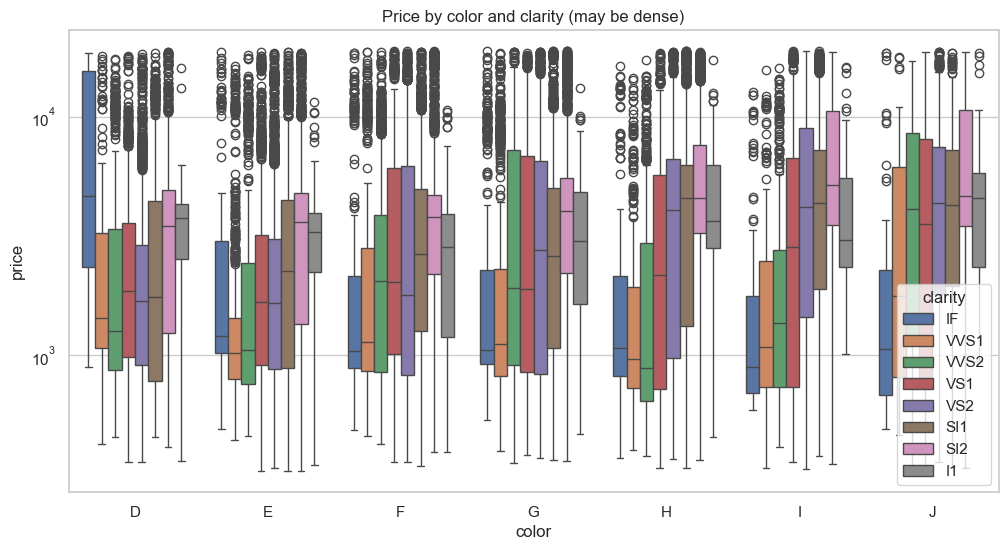

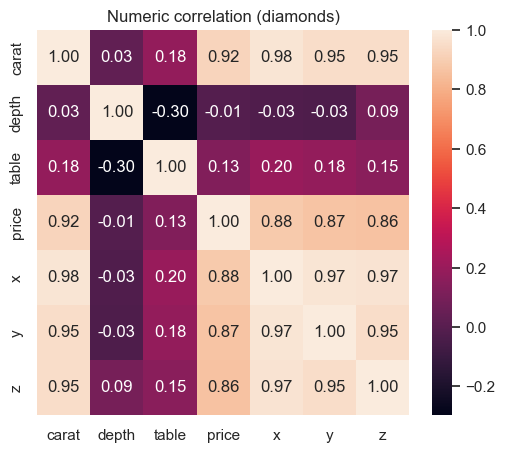

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [68]:
try:
    diamonds = sns.load_dataset('diamonds')
except Exception as e:
    print('diamonds dataset not available in this seaborn installation. Please install seaborn-data or provide dataset file.')
    diamonds = None


if diamonds is not None:
    diamonds.head()
    diamonds.info()
    diamonds.describe()


# Price vs carat
plt.figure(figsize=(8,6))
sns.scatterplot(data=diamonds.sample(500, random_state=1), x='carat', y='price', alpha=0.6)
sns.regplot(data=diamonds.sample(500, random_state=1), x='carat', y='price', scatter=False, lowess=True)
plt.title('Price vs Carat (sample)')
plt.show()


# Price by cut
plt.figure(figsize=(8,5))
sns.boxplot(data=diamonds, x='cut', y='price')
plt.title('Price distribution by cut')
plt.yscale('log')
plt.show()


# Clarity vs Color effect (boxplot grid)
plt.figure(figsize=(12,6))
sns.boxplot(data=diamonds, x='color', y='price', hue='clarity')
plt.title('Price by color and clarity (may be dense)')
plt.yscale('log')
plt.show()


# Correlation heatmap of numeric columns
numd = diamonds.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(6,5))
sns.heatmap(numd.corr(), annot=True, fmt='.2f')
plt.title('Numeric correlation (diamonds)')
plt.show()


# Central tendency of price
diamonds['price'].describe()

In [69]:
###Observations : Price strongly correlates with carat; cut/clarity/color shift distribution but 
###carat often dominates. 

In [70]:
###Dataset 6 — flights

In [71]:
flights = sns.load_dataset('flights')
flights.head()
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


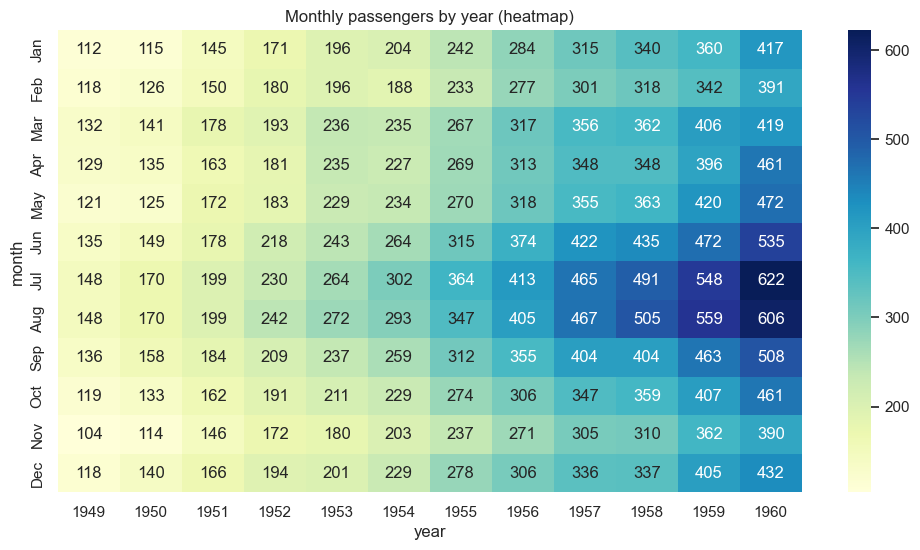

In [72]:
# Pivot to heatmap format
air = flights.pivot(index='month', columns='year', values='passengers')
plt.figure(figsize=(12,6))
sns.heatmap(air, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Monthly passengers by year (heatmap)')
plt.show()

In [73]:
# Line plot: passengers over time
plt.figure(figsize=(10,4))
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'])
flights_sorted = flights.sort_values('date')
plt.plot(flights_sorted['date'], flights_sorted['passengers'])
plt.title('Passengers over time')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

TypeError: Object with dtype category cannot perform the numpy op add

<Figure size 1000x400 with 0 Axes>

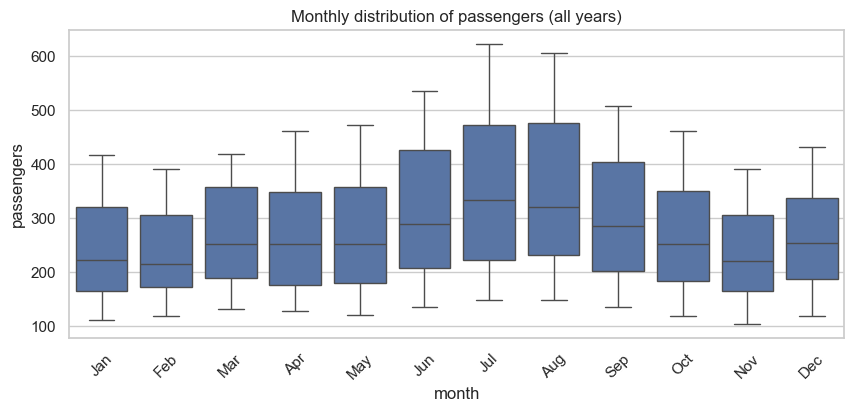

In [74]:
# Seasonality — average by month across years
plt.figure(figsize=(10,4))
sns.boxplot(data=flights, x='month', y='passengers')
plt.title('Monthly distribution of passengers (all years)')
plt.xticks(rotation=45)
plt.show()

In [75]:
# Year with highest total
flights.groupby('year')['passengers'].sum().sort_values(ascending=False).head()

year
1960    5714
1959    5140
1958    4572
1957    4421
1956    3939
Name: passengers, dtype: int64

In [76]:
###Dataset 7 — car_crashes

In [77]:
crashes = sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [78]:
crashes.describe(include='all')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137,NaN
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922,NaN
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000,NaN
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000,NaN
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000,NaN
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000,NaN


In [79]:
### 1. Which states have the highest and lowest accident rates?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14032\3075225282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crashes_sorted.head(10), x='abbrev', y='total', palette='Reds_r')


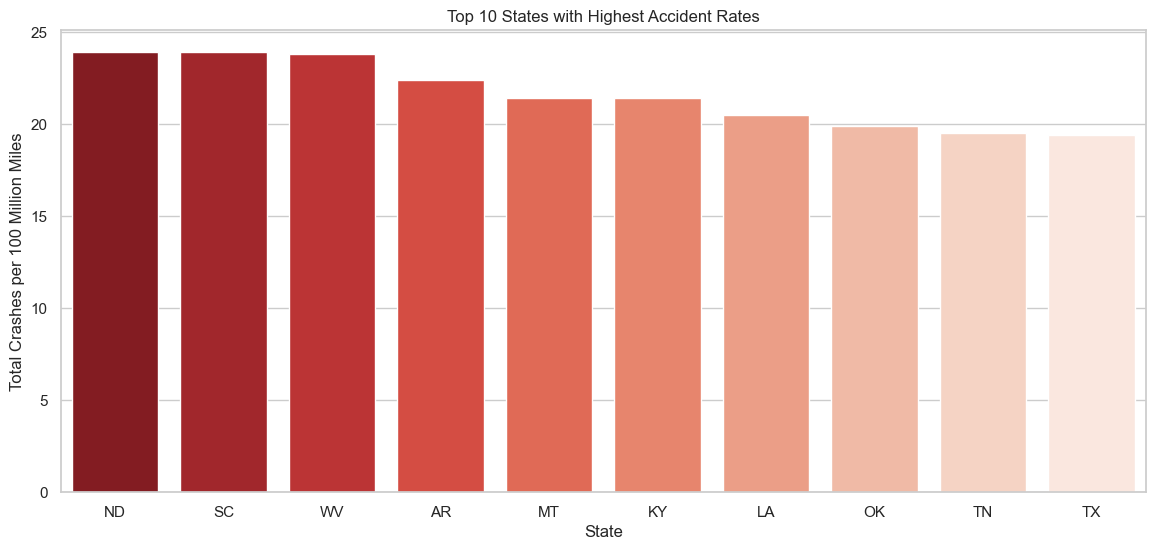

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14032\3075225282.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crashes_sorted.tail(10), x='abbrev', y='total', palette='Greens')


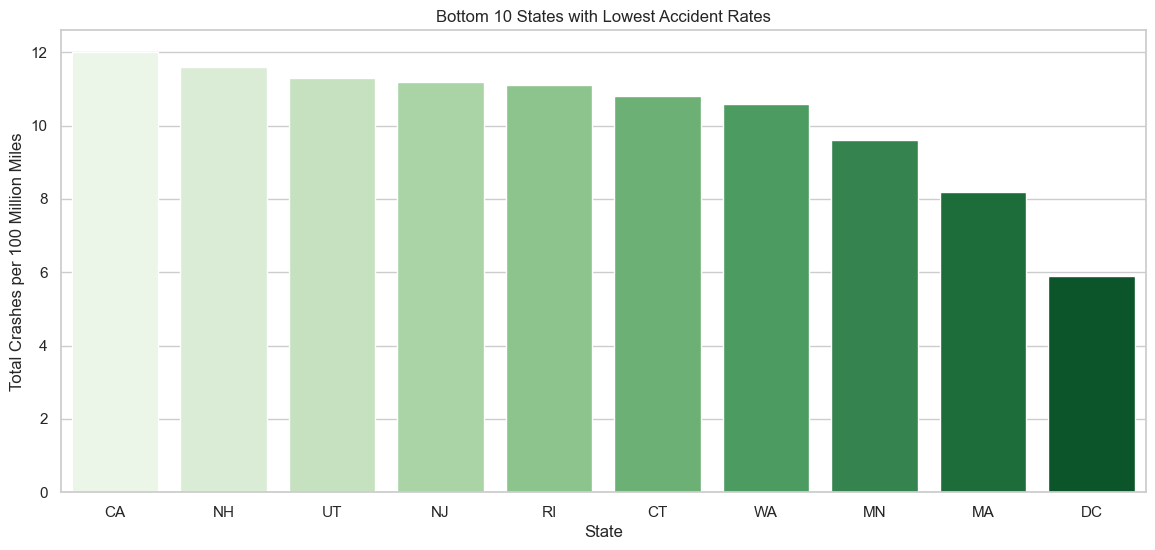

In [81]:
 ###Sort by total crash rate
crashes_sorted = crashes.sort_values('total', ascending=False)


plt.figure(figsize=(14,6))
sns.barplot(data=crashes_sorted.head(10), x='abbrev', y='total', palette='Reds_r')
plt.title('Top 10 States with Highest Accident Rates')
plt.ylabel('Total Crashes per 100 Million Miles')
plt.xlabel('State')
plt.show()


plt.figure(figsize=(14,6))
sns.barplot(data=crashes_sorted.tail(10), x='abbrev', y='total', palette='Greens')
plt.title('Bottom 10 States with Lowest Accident Rates')
plt.ylabel('Total Crashes per 100 Million Miles')
plt.xlabel('State')
plt.show()

In [82]:
### tates vary significantly — some show nearly double the crash rate of others, possibly due to differences in urban density, 
###road conditions, or reporting standards.

In [83]:
## 2. Is there a relationship between speeding and total crashes?

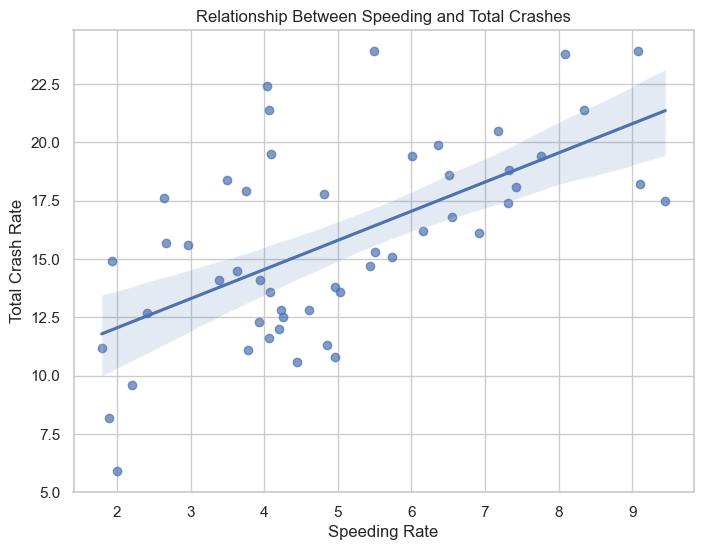

,speeding,total
speeding,1.000000,0.611548
total,0.611548,1.000000


In [84]:
plt.figure(figsize=(8,6))
sns.regplot(data=crashes, x='speeding', y='total', scatter_kws={'alpha':0.7})
plt.title('Relationship Between Speeding and Total Crashes')
plt.xlabel('Speeding Rate')
plt.ylabel('Total Crash Rate')
plt.show()


# Correlation value
crashes[['speeding','total']].corr()

In [85]:
## There is a strong positive correlation between speeding and total crashes, 
## suggesting speeding contributes substantially to total accident rates.

In [86]:
## 3. Does insurance coverage percentage affect fatal crash rates?

<Figure size 800x600 with 0 Axes>

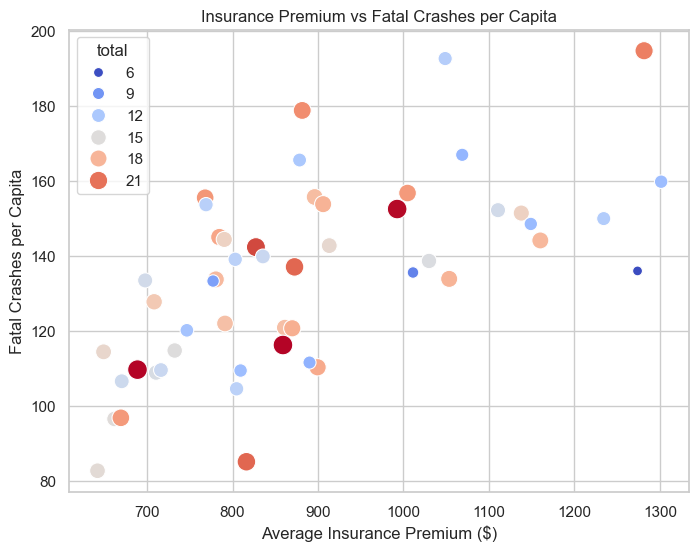

In [90]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=crashes, x='ins_premium', y='ins_losses', hue='total', palette='coolwarm', size='total', sizes=(50,200))
plt.title('Insurance Premium vs Fatal Crashes per Capita')
plt.xlabel('Average Insurance Premium ($)')
plt.ylabel('Fatal Crashes per Capita')
plt.show()

In [91]:
### 4. How do alcohol-related crashes correlate with total crashes?

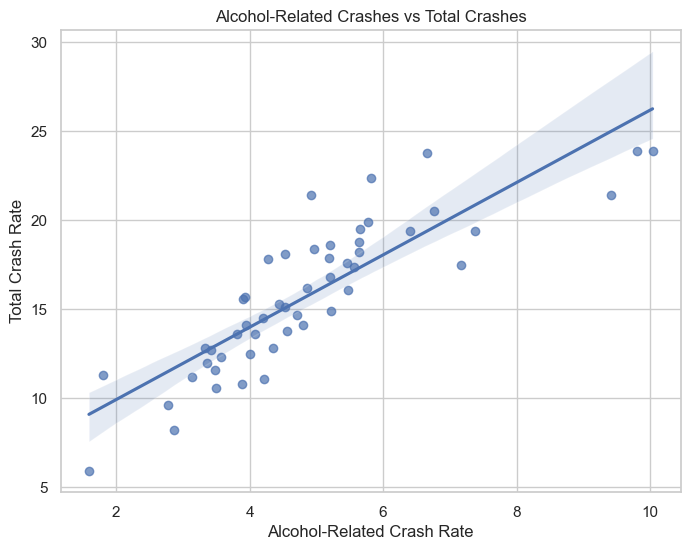

,alcohol,total
alcohol,1.000000,0.852613
total,0.852613,1.000000


In [92]:
plt.figure(figsize=(8,6))
sns.regplot(data=crashes, x='alcohol', y='total', scatter_kws={'alpha':0.7})
plt.title('Alcohol-Related Crashes vs Total Crashes')
plt.xlabel('Alcohol-Related Crash Rate')
plt.ylabel('Total Crash Rate')
plt.show()


# Correlation
crashes[['alcohol','total']].corr()

In [93]:
### Alcohol involvement is positively correlated with total crashes — 
### states with higher alcohol-related crash rates generally report more total crashes overall.


In [94]:
## 5. Identify outliers and discuss possible reasons

In [95]:
# Identify potential outliers based on total crash rate
q1 = crashes['total'].quantile(0.25)
q3 = crashes['total'].quantile(0.75)
iqr = q3 - q1


outliers = crashes[(crashes['total'] < (q1 - 1.5 * iqr)) | (crashes['total'] > (q3 + 1.5 * iqr))]
outliers[['abbrev','total']]

,abbrev,total


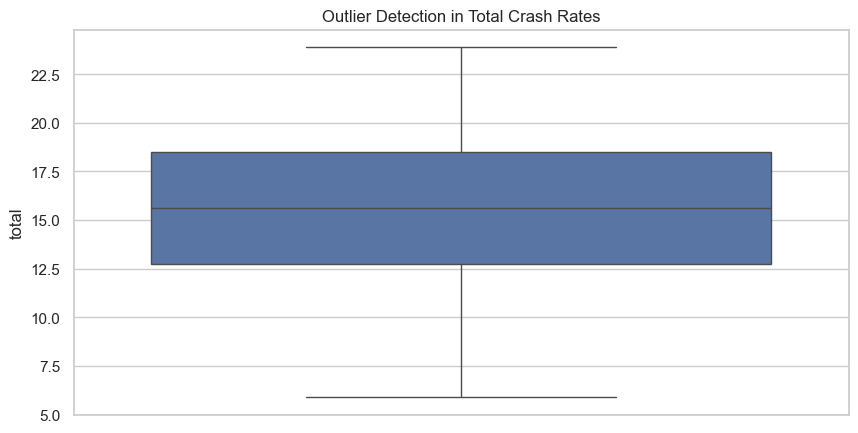

In [96]:
# Visualize outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=crashes, y='total')
plt.title('Outlier Detection in Total Crash Rates')
plt.show()

In [97]:
### Outliers may correspond to states with unusual population densities or extreme traffic environments.

### Urban-heavy states could report higher accident rates due to more vehicles, 
### while rural states might show anomalies due to long travel distances and higher speed averages.

In [98]:
### 6. Correlation Heatmap

In [103]:
plt.figure(figsize=(8,6))
sns.heatmap(crashes.corr())
plt.title('Correlation Heatmap: Car Crashes Dataset')
plt.show()

ValueError: could not convert string to float: 'AL'